In [67]:
import tensorflow as tf
import pandas as pd
import tqdm
import cv2
from tensorflow.keras import datasets, layers, models
import os
import numpy as np

In [68]:
train=pd.read_csv('./dataset/train.csv')
test=pd.read_csv('./dataset/test.csv')
train.head()
train['Class'][2]

'Attire'

In [69]:
Class_map={'Food':0,'Attire':1,'Decorationandsignage':2,'misc':3}
inverse_map={0:'Food',1:'Attire',2:'Decorationandsignage',3:'misc'}
train['Class']=train['Class'].map(Class_map)
train['Class'][2]

1

In [83]:
train_img=[]
train_label=[]
j=0
path='./dataset/Train Images'
for i in tqdm.tqdm(train['Image']):
    final_path=os.path.join(path,i)
    img=cv2.imread(final_path)
    #print(img.shape[:2])
    img=cv2.resize(img,(150,150))/255.0
    img=img.astype('float32')
    train_img.append(img)
    train_label.append(train['Class'][j])
    j=j+1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5983/5983 [00:03<00:00, 1546.69it/s]


In [71]:
# Split train dataset in train and validation dataset
# Validation dataset is 30% of data and train is 70 %
train_size = len(train_img)
val_images = np.array(train_img[round(train_size*0.7):])
val_labels = np.array(train_label[round(train_size*0.7):])
train_images = np.array(train_img[:round(train_size*0.7)])
train_labels = np.array(train_label[:round(train_size*0.7)])


In [72]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 flatten_8 (Flatten)         (None, 73984)            

In [73]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(val_images, val_labels))


Epoch 1/10
131/131 [==============================] - 53s 401ms/step - loss: 1.2899 - accuracy: 0.3878 - val_loss: 1.1910 - val_accuracy: 0.4680
Epoch 2/10
131/131 [==============================] - 56s 431ms/step - loss: 1.1975 - accuracy: 0.4587 - val_loss: 1.1900 - val_accuracy: 0.4624
Epoch 3/10
131/131 [==============================] - 55s 417ms/step - loss: 1.1206 - accuracy: 0.5105 - val_loss: 1.1411 - val_accuracy: 0.5003
Epoch 4/10
131/131 [==============================] - 53s 402ms/step - loss: 1.0221 - accuracy: 0.5578 - val_loss: 1.1650 - val_accuracy: 0.5153
Epoch 5/10
131/131 [==============================] - 53s 405ms/step - loss: 0.8430 - accuracy: 0.6502 - val_loss: 1.3021 - val_accuracy: 0.4763
Epoch 6/10
131/131 [==============================] - 61s 469ms/step - loss: 0.6068 - accuracy: 0.7600 - val_loss: 1.7238 - val_accuracy: 0.4635
Epoch 7/10
131/131 [==============================] - 54s 409ms/step - loss: 0.4070 - accuracy: 0.8457 - val_loss: 1.9367 - val_ac

57/57 - 4s - loss: 3.5252 - accuracy: 0.4524 - 4s/epoch - 73ms/step


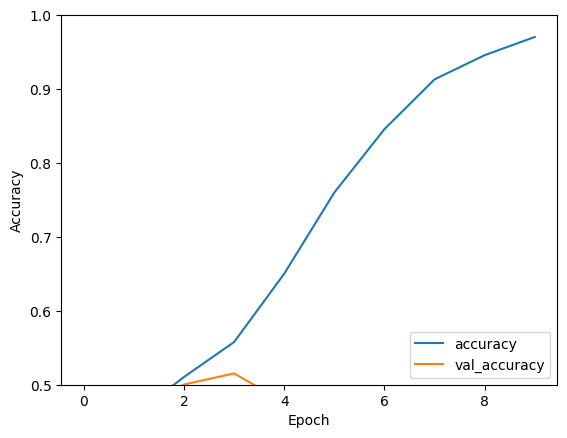

In [74]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(val_images,  val_labels, verbose=2)


In [75]:
test_img=[]
path='./dataset/Test Images'
for i in tqdm.tqdm(test['Image']):
    final_path=os.path.join(path,i)
    img=cv2.imread(final_path)
    img=cv2.resize(img,(150,150))
    img=img.astype('float32')
    test_img.append(img)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3219/3219 [2:00:03<00:00,  2.24s/it]


In [76]:
test_img = np.array(test_img)

In [77]:
labels = model.predict(test_img)

101/101 [==============================] - 7s 70ms/step


In [78]:
labels[:4]

array([[ -201.96326,   477.42072,  -747.20526,   886.24976],
       [  674.5095 ,  1002.22925,  -569.92505,    79.70326],
       [ 1194.3225 ,  1724.7179 ,  -946.41516,   113.64885],
       [  443.7953 ,  1002.362  , -1593.1631 ,   718.991  ]],
      dtype=float32)

In [79]:
label = [np.argmax(i) for i in labels]

In [80]:
label[:4]

[3, 1, 1, 1]

In [81]:
class_label = [inverse_map[x] for x in label]
print(class_label[:3])

['misc', 'Attire', 'Attire']


In [82]:
submission = pd.DataFrame({ 'Image': test.Image, 'Class': class_label })
submission.head(10)
submission.to_csv('submission.csv', index=False)
